
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [16]:
import pandas as pd

df = pd.read_excel('data.xlsx')

display(df.head(10))
df.info()
print(df.isna().sum())
print("Дубликаты:", df.duplicated().sum())

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто
5,7166,Контекстная реклама,Электронные устройства,Т. Ли,USB,Aladdin,Оренбург,0,1000,2020-06-18,NaT,,В процессе
6,7185,Контекстная реклама,Электронные устройства,Т. Ли,USB,Aladdin,Оренбург,0,1000,2019-07-03,NaT,,Потерянно
7,7047,Контекстная реклама,Электронные устройства,Т. Ли,USB Beijing,Aladdin,Оренбург,250,1000,2020-01-04,2020-01-10,7,Закрыто
8,6645,Контекстная реклама,Электронные устройства,Т. Ли,USB Guanzhou,Aladdin,Оренбург,800,1000,2020-01-04,2020-01-10,7,Закрыто
9,7210,Холодный звонок,Ткань и аксессуары,А. Фостер,Ткань,A-Fashion,Оренбург,0,500,2019-06-03,NaT,,Потерянно


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [17]:
#Заменяю на снейк кейс
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(r"\s+", "_", regex=True)
)

print(df.columns.tolist())

['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер', 'название_заказа', 'продавец', 'город', 'продажи_факт,_тыс.руб', 'продажи_план,_тыс.руб', 'дата_сделки', 'дата_оплаты', 'дней_между_сделкой_и_оплатой', 'статус']


In [18]:
#преобразую в более привычный вид
df = df.rename(columns={
    "продажи_факт,_тыс.руб": "продажи_факт_тыс",
    "продажи_план,_тыс.руб": "продажи_план_тыс",
})
#дни это численный показатель
df["дней_между_сделкой_и_оплатой"] = pd.to_numeric(df["дней_между_сделкой_и_оплатой"], errors="coerce")

print(df.dtypes)
#проверяю пропуски
print(df.isna().sum())

номер_заказа                             int64
канал_продаж                            object
продуктовый_сегмент                     object
менеджер                                object
название_заказа                         object
продавец                                object
город                                   object
продажи_факт_тыс                         int64
продажи_план_тыс                         int64
дата_сделки                     datetime64[ns]
дата_оплаты                     datetime64[ns]
дней_между_сделкой_и_оплатой           float64
статус                                  object
dtype: object
номер_заказа                     0
канал_продаж                     0
продуктовый_сегмент              0
менеджер                         0
название_заказа                  0
продавец                         0
город                            0
продажи_факт_тыс                 0
продажи_план_тыс                 0
дата_сделки                      0
дата_оплаты              

In [19]:
#не заполняю, могут иметь смысл как "оплата не получена", создал отдельный столбец
df["оплата_получена"] = df["дата_оплаты"].notna().astype(int)

In [23]:
#группирую по городу и считаю сумму продаж
sales_by_city = df.groupby("город")["продажи_факт_тыс"].sum().reset_index()

#добалвяю обратно в таблицу
df = df.merge(sales_by_city, on="город", how="left", suffixes=("", "_всего_по_городу"))

print(sales_by_city)

              город  продажи_факт_тыс
0         Волгоград              4250
1            Казань              8040
2          Кемерово              1500
3             Курск               700
4            Липецк                 0
5      Магнитогорск              7680
6            Москва              3717
7   Нижний Новгород              1635
8       Новосибирск              5725
9              Омск               250
10         Оренбург              2750
11            Пермь               770
12           Самара              5574
13  Санкт-Петербург              1370
14          Саратов               430
15      Севастополь                 0
16             Сочи              6950
17       Стоврополь                 0
18             Тула              1850
19         Улан-Удэ               970
20              Уфа              4350
21        Челябинск              8700
22        Ярославль                 0


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")
%matplotlib inline

In [25]:
df['дата_сделки'] = pd.to_datetime(df['дата_сделки'], errors='coerce')
df['год']  = df['дата_сделки'].dt.year
df['месяц'] = df['дата_сделки'].dt.month
df['ym'] = df['дата_сделки'].dt.to_period('M').astype(str)  # 'YYYY-MM'

Итого факт (тыс): 67211 план (тыс): 84500 выполнение: 0.795396449704142


,менеджер,fact,plan,deals,fulfil
1,А. Фостер,6950,6000,6,1.158333
2,М. Баили,24022,25500,35,0.942039
3,Р. Хайерс,29929,37500,37,0.798107
0,А. Перри,650,1000,2,0.650000
4,С. Милер,2260,5000,5,0.452000
5,Т. Ли,3400,9500,8,0.357895


/tmp/ipython-input-2644337215.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='менеджер', x='fulfil', data=top10, palette='viridis')


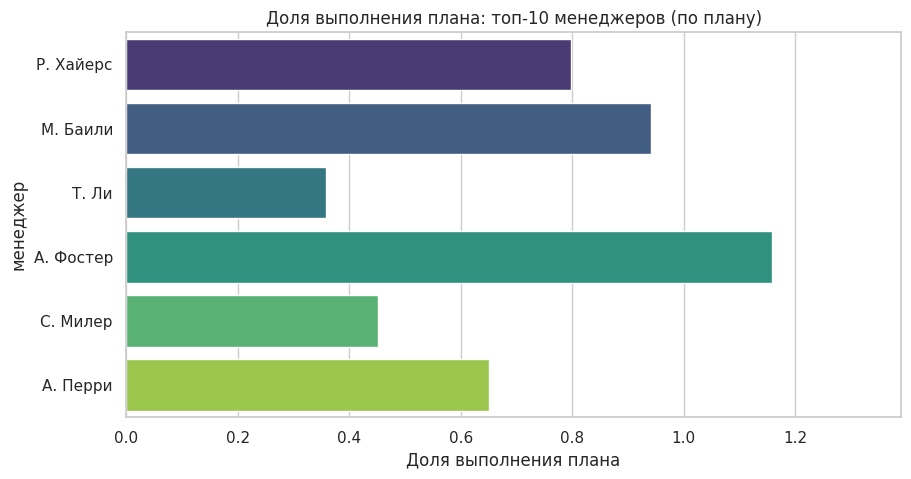

In [28]:
# общий KPIs
total_fact = df['продажи_факт_тыс'].sum()
total_plan = df['продажи_план_тыс'].sum()
overall_fill = total_fact / total_plan
print("Итого факт (тыс):", total_fact, "план (тыс):", total_plan, "выполнение:", overall_fill)

#суммируем продажи фактические и плановые, считаем выполнение
by_manager = df.groupby('менеджер').agg(
    fact = ('продажи_факт_тыс','sum'),
    plan = ('продажи_план_тыс','sum'),
    deals = ('Номер_заказа' if 'Номер_заказа' in df.columns else 'название_заказа', 'nunique')
).reset_index()
by_manager['fulfil'] = by_manager['fact'] / by_manager['plan']
by_manager = by_manager.sort_values('fulfil', ascending=False)
display(by_manager.head(10))

#выполнение топ-10 менеджеров по объёму плана
top10 = by_manager.sort_values('plan', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y='менеджер', x='fulfil', data=top10, palette='viridis')
plt.xlabel('Доля выполнения плана')
plt.title('Доля выполнения плана: топ-10 менеджеров (по плану)')
plt.xlim(0, top10['fulfil'].max()*1.2)
plt.show()


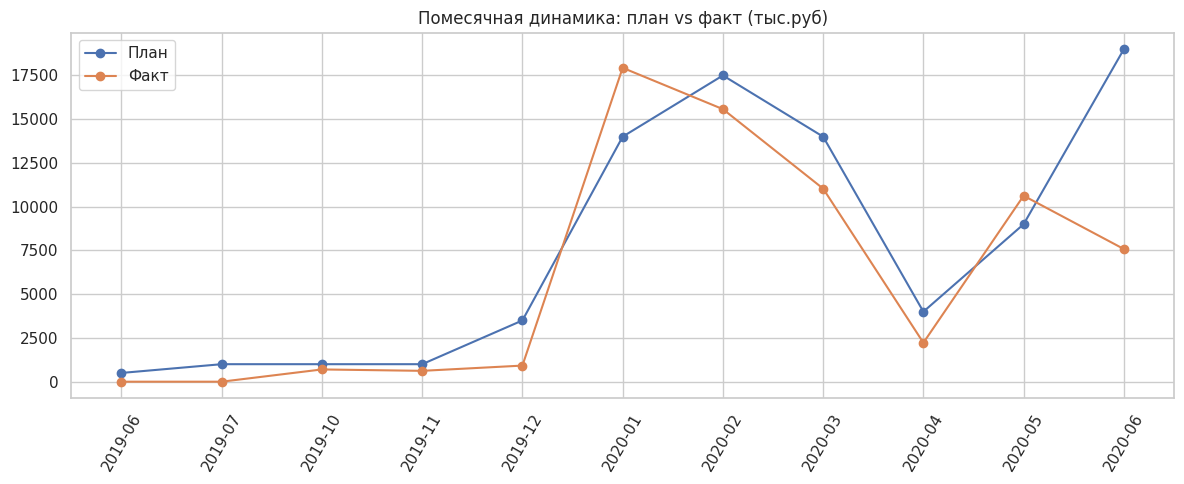

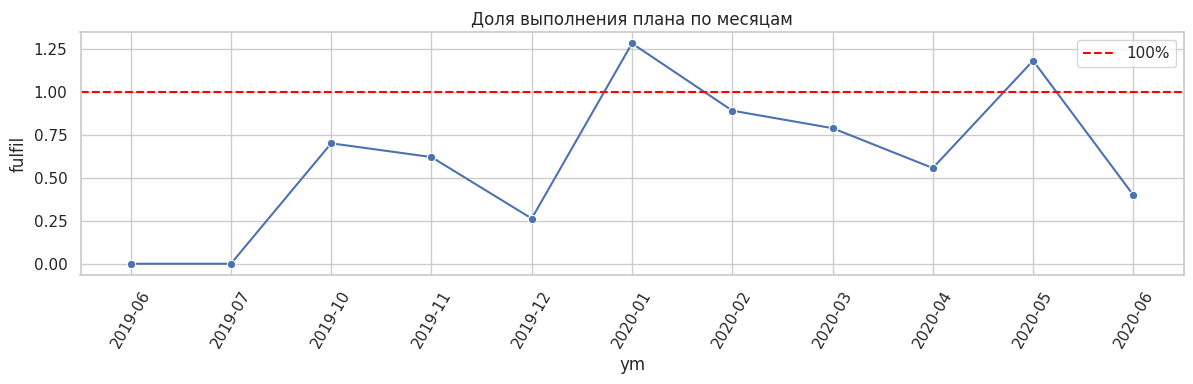

In [29]:
monthly = df.groupby('ym').agg(
    fact = ('продажи_факт_тыс','sum'),
    plan = ('продажи_план_тыс','sum'),
    deals = ('Номер_заказа' if 'Номер_заказа' in df.columns else 'название_заказа', 'nunique')
).reset_index()
monthly['fulfil'] = monthly['fact'] / monthly['plan']

# факт и план по месяцам
plt.figure(figsize=(12,5))
plt.plot(monthly['ym'], monthly['plan'], label='План', marker='o')
plt.plot(monthly['ym'], monthly['fact'], label='Факт', marker='o')
plt.xticks(rotation=60)
plt.title('Помесячная динамика: план vs факт (тыс.руб)')
plt.legend()
plt.tight_layout()
plt.show()

#доля выполнения по месяцам
plt.figure(figsize=(12,4))
sns.lineplot(x='ym', y='fulfil', data=monthly, marker='o')
plt.xticks(rotation=60)
plt.title('Доля выполнения плана по месяцам')
plt.axhline(1, color='red', linestyle='--', label='100%')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
#Проверим месяцы с наименьшим средним
monthly_summary = monthly.copy()
monthly_summary['deals'] = monthly['deals']
display(monthly_summary.sort_values('fulfil').head(6))
display(monthly_summary.sort_values('deals').head(6))

,ym,fact,plan,deals,fulfil
0,2019-06,0,500,1,0.000000
1,2019-07,0,1000,1,0.000000
4,2019-12,920,3500,5,0.262857
10,2020-06,7580,19000,19,0.398947
8,2020-04,2225,4000,5,0.556250
3,2019-11,620,1000,2,0.620000


,ym,fact,plan,deals,fulfil
0,2019-06,0,500,1,0.000000
1,2019-07,0,1000,1,0.000000
2,2019-10,700,1000,1,0.700000
3,2019-11,620,1000,2,0.620000
4,2019-12,920,3500,5,0.262857
8,2020-04,2225,4000,5,0.556250


Топ сегменты по продажам: ['Оборудование', 'Другое', 'Свет', 'Ткань и аксессуары', 'Одежда', 'Электронные устройства']


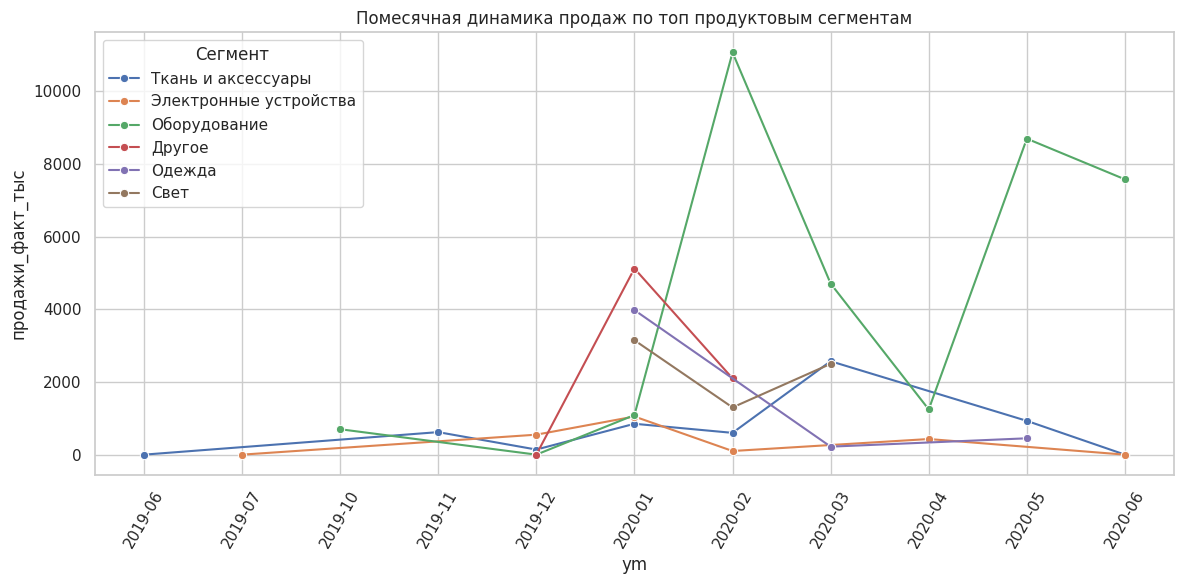

In [31]:
# суммарные продажи по сегментам
seg_sum = df.groupby('продуктовый_сегмент')['продажи_факт_тыс'].sum().sort_values(ascending=False)
top_segs = seg_sum.head(6).index.tolist()
print("Топ сегменты по продажам:", top_segs)

# помесячная сводка по топ-сегментам
seg_month = (df[df['продуктовый_сегмент'].isin(top_segs)]
             .groupby(['ym','продуктовый_сегмент'])['продажи_факт_тыс']
             .sum()
             .reset_index())

plt.figure(figsize=(12,6))
sns.lineplot(data=seg_month, x='ym', y='продажи_факт_тыс', hue='продуктовый_сегмент', marker='o')
plt.xticks(rotation=60)
plt.title('Помесячная динамика продаж по топ продуктовым сегментам')
plt.legend(title='Сегмент')
plt.tight_layout()
plt.show()


In [32]:
# сегменты, у которых сейчас продажи ~0
last_month = monthly['ym'].max()
last_month_sales = seg_month[seg_month['ym']==last_month].set_index('продуктовый_сегмент')['продажи_факт_тыс']
print("Продажи в последнем месяце по топ-сегментам:\n", last_month_sales)


Продажи в последнем месяце по топ-сегментам:
 продуктовый_сегмент
Оборудование              7580
Ткань и аксессуары           0
Электронные устройства       0
Name: продажи_факт_тыс, dtype: int64


,продажи_факт_тыс
город,
Челябинск,8700
Казань,8040
Магнитогорск,7680
Сочи,6950
Новосибирск,5725
Самара,5574
Уфа,4350
Волгоград,4250
Москва,3717


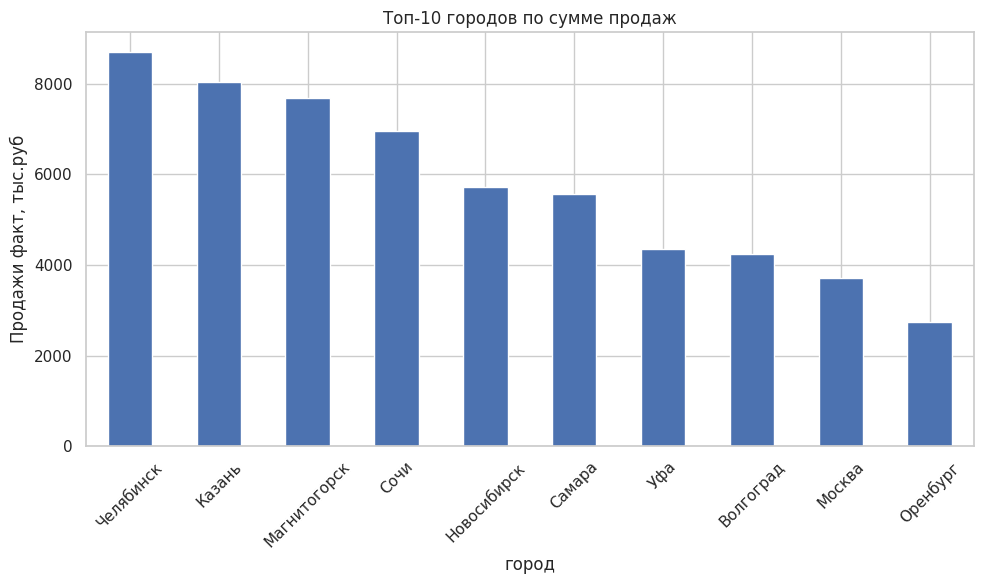

In [33]:
#какие регионы самые доходные
sales_by_city = df.groupby('город')['продажи_факт_тыс'].sum().sort_values(ascending=False)
display(sales_by_city.head(15))

#бар-плот топ-10
plt.figure(figsize=(10,6))
sales_by_city.head(10).plot(kind='bar')
plt.ylabel('Продажи факт, тыс.руб')
plt.title('Топ-10 городов по сумме продаж')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,канал_продаж,fact,plan,deals,paid,median_days,fulfil,conversion
0,Вебсайт,800,2000,3,2,20.0,0.400000,0.666667
1,Выставка,28644,35500,35,28,9.0,0.806873,0.800000
2,Контекстная реклама,2450,7000,7,5,10.0,0.350000,0.714286
3,Почта,1550,3500,4,3,54.0,0.442857,0.750000
4,Рекомендация,18035,17000,21,25,11.0,1.060882,1.190476
5,Холодный звонок,15732,19500,23,30,36.0,0.806769,1.304348


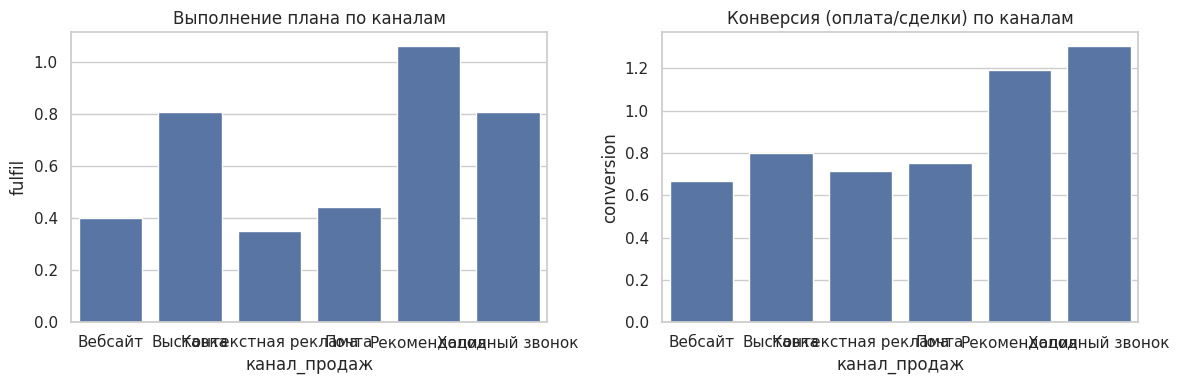

In [35]:
#влияние канала продаж на выполнение плана, конверсию, длительность сделки
by_channel = df.groupby('канал_продаж').agg(
    fact = ('продажи_факт_тыс','sum'),
    plan = ('продажи_план_тыс','sum'),
    deals = ('Номер_заказа' if 'Номер_заказа' in df.columns else 'название_заказа', 'nunique'),
    paid = ('оплата_получена', 'sum'),
    median_days = ('дней_между_сделкой_и_оплатой','median')
).reset_index()
by_channel['fulfil'] = by_channel['fact'] / by_channel['plan']
by_channel['conversion'] = by_channel['paid'] / by_channel['deals']

display(by_channel)

#визуализация: fulfil и conversion
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x='канал_продаж', y='fulfil', data=by_channel, ax=axes[0])
axes[0].set_title('Выполнение плана по каналам')
sns.barplot(x='канал_продаж', y='conversion', data=by_channel, ax=axes[1])
axes[1].set_title('Конверсия (оплата/сделки) по каналам')
plt.tight_layout()
plt.show()


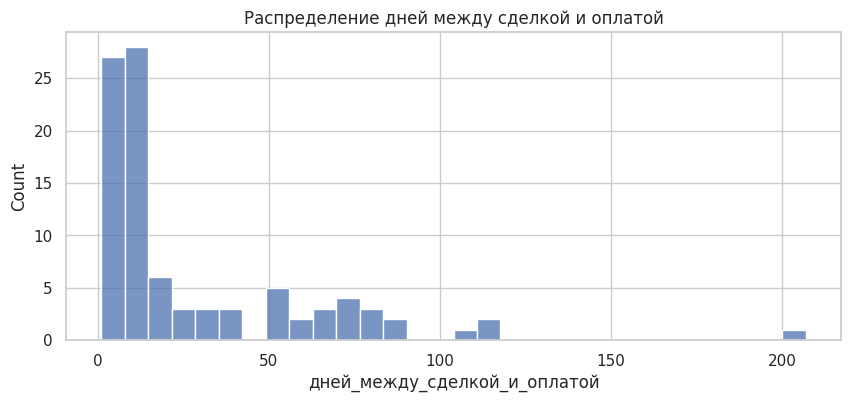

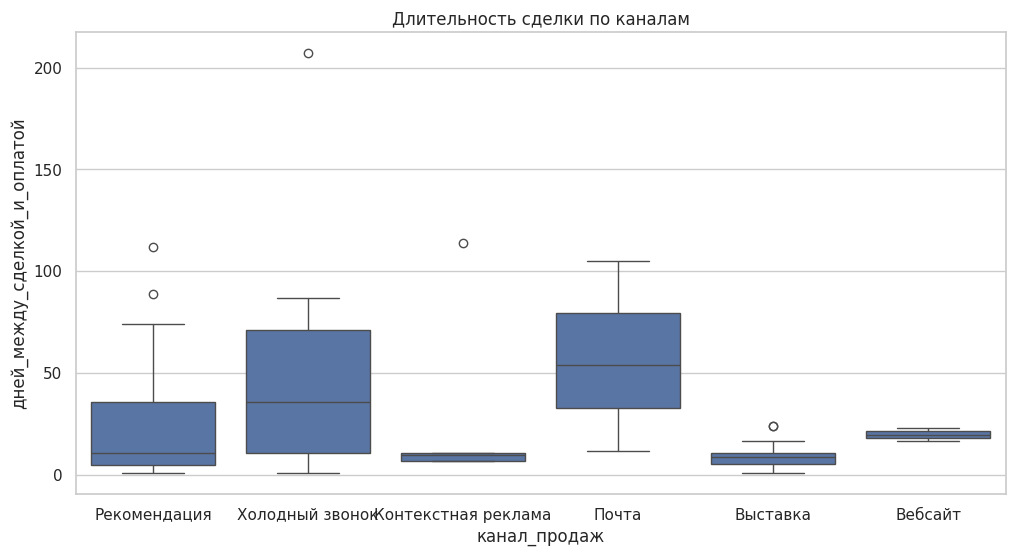

In [36]:
# гистограмма и boxplot по длительности
dur = df[df['дней_между_сделкой_и_оплатой'].notna() & (df['дней_между_сделкой_и_оплатой']>=0)]

plt.figure(figsize=(10,4))
sns.histplot(dur['дней_между_сделкой_и_оплатой'], bins=30, kde=False)
plt.title('Распределение дней между сделкой и оплатой')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='канал_продаж', y='дней_между_сделкой_и_оплатой', data=dur)
plt.title('Длительность сделки по каналам')
plt.show()


In [37]:
# популярные товарные категории
client_col = 'название_заказа' if 'название_заказа' in df.columns else None

# по числу уникальных заказов/клиентов на категорию
if client_col:
    cat_clients = df.groupby('продуктовый_сегмент')[client_col].nunique().sort_values(ascending=False)
    print("Топ сегментов по числу уникальных заказов/клиентов:\n", cat_clients.head(10))
else:
    print("Не найден столбец для подсчёта уникальных клиентов — используем число сделок как proxy.")
    cat_clients = df.groupby('продуктовый_сегмент')['дней_между_сделкой_и_оплатой'].count().sort_values(ascending=False)

# по продажам
cat_sales = df.groupby('продуктовый_сегмент')['продажи_факт_тыс'].sum().sort_values(ascending=False)
print("\nТоп сегментов по продажам:\n", cat_sales.head(10))


Топ сегментов по числу уникальных заказов/клиентов:
 продуктовый_сегмент
Оборудование              44
Ткань и аксессуары        12
Другое                     8
Свет                       6
Электронные устройства     6
Одежда                     5
Упаковка                   3
Спорт товары               2
Медецина                   1
Игрушки                    1
Name: название_заказа, dtype: int64

Топ сегментов по продажам:
 продуктовый_сегмент
Оборудование              35099
Другое                     7225
Свет                       6950
Ткань и аксессуары         5712
Одежда                     4650
Электронные устройства     2130
Бассейн                    1500
Сувениры                    970
Спорт товары                750
Автозапчасти                700
Name: продажи_факт_тыс, dtype: int64


In [38]:
last = df['ym'].max()
seg_last = (df.groupby(['продуктовый_сегмент','ym'])['продажи_факт_тыс'].sum().reset_index())
zero_now = seg_last[(seg_last['ym']==last) & (seg_last['продажи_факт_тыс']==0)]
print("Сегменты с нулевыми продажами в последнем месяце:\n", zero_now['продуктовый_сегмент'].unique())

Сегменты с нулевыми продажами в последнем месяце:
 ['Игрушки' 'Ткань и аксессуары' 'Электронные устройства']


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)

 Анализ показал, что результаты менеджеров зависят от канала продаж и товарного сегмента. Например, через канал «Рекомендация» менеджеры закрывают больше успешных сделок и чаще выполняют план, тогда как при «Холодных звонках» конверсия ниже и цикл сделки дольше. Профилирование позволит закрепить менеджеров за направлениями, где они наиболее эффективны, и повысить общую результативность.

 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

 Самые доходные регионы — Москва и Магнитогорск; именно там сосредоточены основные продажи. Среди каналов наибольшую отдачу даёт «Рекомендация». Эти направления следует масштабировать — расширять клиентскую базу, усиливать присутствие и стимулировать развитие партнёрских программ.